<a href="https://colab.research.google.com/github/naufalahnaf17/tensorflow_learning/blob/main/fashion_mnist_93_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import models
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images,train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
train_images.shape , test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [7]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [8]:
train_images = train_images / 255.
test_images = test_images / 255.

In [9]:
train_labels = to_categorical(train_labels,num_classes=10)
test_labels = to_categorical(test_labels,num_classes=10)

In [10]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [13]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_data = train_datagen.flow(
    train_images,train_labels,
    batch_size=32
)

test_data = test_datagen.flow(
    test_images,test_labels,
    batch_size=32
)

In [14]:
tf.random.set_seed(42)

model_1 = models.Sequential()
model_1.add(Conv2D(32 , (3,3) , activation="relu" , input_shape=(28,28,1)))
model_1.add(Conv2D(32 , (3,3) , activation="relu"))
model_1.add(MaxPooling2D(2,2))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))

model_1.add(Conv2D(64 , (3,3) , activation="relu"))
model_1.add(Conv2D(64 , (3,3) , activation="relu"))
model_1.add(MaxPooling2D(2,2))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.3))

model_1.add(Flatten())
model_1.add(Dense(64,activation="relu"))
model_1.add(Dense(10,activation="sigmoid"))

model_1.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

model_1.fit(train_data,epochs=50,validation_data=test_data)

Epoch 1/50
1875/1875 [==============================] - 21s 7ms/step - loss: 0.4491 - accuracy: 0.8347 - val_loss: 0.3152 - val_accuracy: 0.8857
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2956 - accuracy: 0.8896 - val_loss: 0.2899 - val_accuracy: 0.8938
Epoch 3/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2596 - accuracy: 0.9059 - val_loss: 0.2614 - val_accuracy: 0.9057
Epoch 4/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2405 - accuracy: 0.9111 - val_loss: 0.2646 - val_accuracy: 0.8997
Epoch 5/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2239 - accuracy: 0.9184 - val_loss: 0.2381 - val_accuracy: 0.9127
Epoch 6/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2071 - accuracy: 0.9226 - val_loss: 0.2684 - val_accuracy: 0.9028
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1971 - accuracy: 0.9261 - val_loss: 0.2407 - val_ac

In [15]:
model_1.evaluate(test_data)

313/313 [==============================] - 1s 4ms/step - loss: 0.2806 - accuracy: 0.9314


[0.28060561418533325, 0.9314000010490417]

In [16]:
preds = model_1.predict(test_data)

313/313 [==============================] - 1s 3ms/step


1/1 [==============================] - 0s 95ms/step


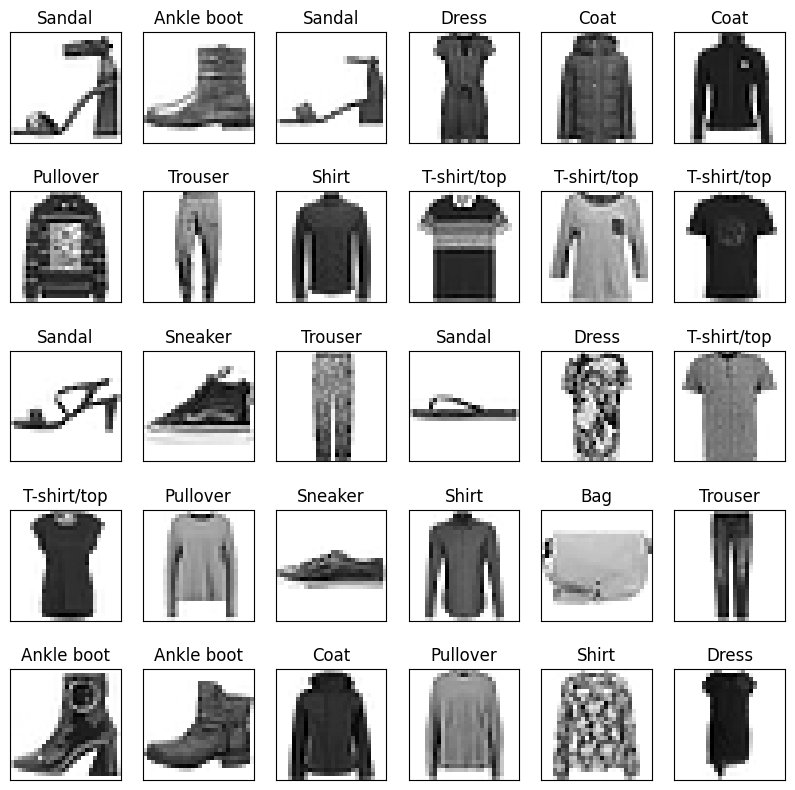

In [17]:
sample_image, sample_label = next(iter(test_data))
prediction = model_1.predict(sample_image)

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(sample_image[i],cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_names[np.argmax(prediction[i])])
plt.show()